# OOD Detection 

> A library to detect out-of-distribution (OOD) data points using the feature embeddings and it's the corresponding label

This library is used for OOD Detection where a model encounters new classes at test time that were not seen during training. The goal is to detect that such inputs do not belong to any of the training classes.

![CI](https://github.com/yashwiai/ood_detection/workflows/CI/badge.svg) [![PyPI](https://img.shields.io/pypi/v/ood_detection?color=blue&label=pypi%20version)](https://pypi.org/project/ood_detection/#description) [![Conda (channel only)](https://img.shields.io/conda/vn/yashkhandelwal/ood_detection?color=seagreen&label=conda%20version)](https://anaconda.org/yashkhandelwal/ood_detection)

## Install

```sh
pip install ood_detection
```
or
```sh
conda install -c yashkhandelwal ood_detection
```

## Example Usage

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from ood_detection.core import OODMetric

In [ ]:
# example dataset
n_samples = 1000
n_centers = 10
n_features = 1024

x, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, random_state=0)

In [ ]:
# using the last 5 cluster as the test and rest as train
train_embedding = x[np.where(y < (n_centers - 5))]
train_labels = y[np.where(y < (n_centers - 5))]

test_embedding = x[np.where(y >= (n_centers - 5))]
test_labels = y[np.where(y >= (n_centers - 5))]

In [ ]:
#| output: false
ood = OODMetric(train_embedding, train_labels)

in_distribution_rmd = ood.compute_rmd(train_embedding)
ood_rmd = ood.compute_rmd(test_embedding)

Computing RMD using the computed mean and covariance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 120.52it/s]


Computing RMD using the background mean and covariance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 659.94it/s]


Computing RMD using the computed mean and covariance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 134.32it/s]


Computing RMD using the background mean and covariance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 655.66it/s]


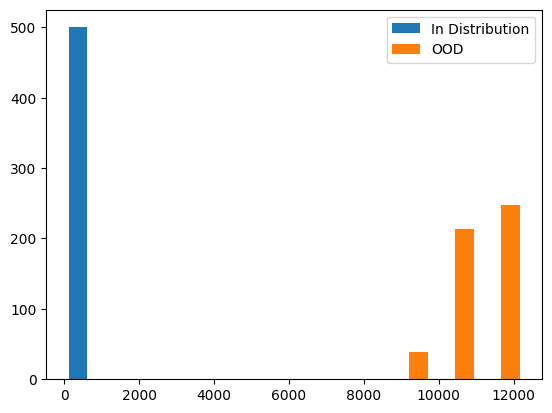

In [ ]:
plt.hist([in_distribution_rmd, ood_rmd], label=["In Distribution", "OOD"])
plt.legend()
plt.show()

## Built using NBDev

This OOD Detection library was built in a jupyter notebook with proper documentation and test cases. These test cases are verified before they are published to GitHub Pages, PyPi, Conda, etc.

I've written down a [NBDev Tutorial](https://yashwiai.github.io/ood_detection/tutorial.html) explaining the thought process of Jeremy Howard and the folks at FastAI behind building it. The tutorial covers how to get started, important functions, and a description of those I used with the issues I faced while exploring the tool for the first time.

## Acknowledgements

Special thanks to **[Yugam Tiwari](https://www.linkedin.com/in/tiwari-yugam)** for explaining the code he has written for the OODMetric and for helping me with packaging the library.

Thanks to **[Soma Dhavala](https://in.linkedin.com/in/somasdhavala)** for coming up with the idea to prepare NBDev Tutorial and helping with the initial reading and exploration material.

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()